In [82]:
# Relevant imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
from networkx.readwrite.gexf import read_gexf
from networkx.algorithms.cluster import average_clustering

In [40]:
# Reading and drawing the stock network:
G = read_gexf('stock_network.gexf')

In [21]:
# Computing Jaccard coefficients for the existing node pairs to find strong ties:
J_strong = nx.jaccard_coefficient(G, ebunch=G.edges())
J_strong = list(J_strong)

In [22]:
# Computing Jaccard coefficients for the non-existing node pairs to find weak ties:
J_weak = nx.jaccard_coefficient(G)
J_weak = list(J_weak)

In [23]:
# Sort links based on the magnitude of Jaccard coefficient:
J_strong.sort(key=lambda link: link[2], reverse=True)
J_weak.sort(key=lambda link: link[2], reverse=True)

In [41]:
# Print Top 25 (in terms of Jaccard coefficient) strong ties:
print "Top 25 Strong Ties:"
for i in range(25):
    print "%s <-> %s: %f" % (J_strong[i][0], J_strong[i][1], J_strong[i][2])

Top 25 Strong Ties:
COST <-> VRSK: 0.972603
IDXX <-> ADSK: 0.964981
CDNS <-> SNPS: 0.963983
FIS <-> AON: 0.963702
WM <-> RSG: 0.960967
COO <-> AON: 0.956600
GOOG <-> ACN: 0.953237
KYCCF <-> MTD: 0.952381
CSGP <-> MSFT: 0.950980
BR <-> UNH: 0.950963
AMZN <-> ADBE: 0.950884
IHI <-> ACN: 0.950089
ANSS <-> MSFT: 0.948413
CPRT <-> CSGP: 0.946955
ANSS <-> CSGP: 0.946746
ICE <-> AON: 0.946619
TT <-> %5EIXIC: 0.946097
odfl <-> ADSK: 0.945841
WEC <-> XEL: 0.944690
RMD <-> CSGP: 0.943689
IHI <-> shw: 0.943662
LZAGY <-> odfl: 0.943249
PAYC <-> TEAM: 0.943231
CDNS <-> Now: 0.943158
SPGI <-> CTAS: 0.942959


In [42]:
# Print Top 25 (in terms of Jaccard coefficient) weak ties:
print "Top 25 Weak Ties:"
for i in range(25):
    print "%s <-> %s: %f" % (J_weak[i][0], J_weak[i][1], J_weak[i][2])

Top 25 Weak Ties:
ANTARCHILE.SN <-> BCI.SN: 1.000000
ITSA4.SA <-> elet6.sa: 1.000000
0019.HK <-> BPSO.MI: 1.000000
RRTL.DE <-> BARC.L: 1.000000
3377.HK <-> 0386.HK: 1.000000
SAP <-> MRAAY: 0.712088
DLR <-> AKAM: 0.707022
CTXS <-> frcoy: 0.701923
AKAM <-> JBL: 0.701847
DLR <-> omrny: 0.694118
2010.SR <-> 1010.SR: 0.692308
1010.SR <-> 5110.SR: 0.692308
MAA <-> omrny: 0.673660
3328.hk <-> 1766.HK: 0.666667
2888.TW <-> 6505.TW: 0.666667
1605.T <-> 5406.T: 0.666667
FNV <-> frcoy: 0.665012
XEL <-> SIVB: 0.660819
ENEL.MI <-> LTG.L: 0.655385
WEC <-> URI: 0.654150
2914.T <-> 8366.T: 0.653846
INFY <-> FMC: 0.653846
SWKS <-> RS: 0.651885
1878.T <-> 8058.T: 0.650000
SFTBY <-> NCBDF: 0.648649


In [90]:
# Making copies of G for use below:
G_strong = deepcopy(G)
G_weak = deepcopy(G)

In [83]:
# First we investigate network robustness when removing the strong ties from the graph
# by removing the links in order of decreasing Jackard coefficient and computing the 
# probability of the random node being in a giant component:
L_init = G_strong.number_of_edges()
G_giant = max(nx.connected_component_subgraphs(G_strong), key=len)
P_inf_0 = G_giant.number_of_nodes() / float(G_strong.number_of_nodes())
clust_init = average_clustering(G_strong)

f_hist_str = [0]
P_hist_str = [1]
clust_hist_str = [clust_init]

for i in tqdm(range(L_init)):
    G_strong.remove_edge(J_strong[i][0], J_strong[i][1])
    
    if i % 1000 == 0:
        f = 1 - G_strong.number_of_edges() / float(L_init)
        G_giant = max(nx.connected_component_subgraphs(G_strong), key=len)
        P_inf = G_giant.number_of_nodes() / float(G_strong.number_of_nodes())
        clust = average_clustering(G_strong)
        f_hist_str.append(f)
        P_hist_str.append(P_inf / P_inf_0)
        clust_hist_str.append(clust)

100%|██████████| 139561/139561 [26:41<00:00, 87.12it/s]  


In [91]:
# Second we investigate network robustness when removing the weak ties from the graph
# by removing the nodes in order of decreasing Jackard coefficient and computing the 
# probability of the random node being in a giant component:
L_init = G_weak.number_of_edges()
G_giant = max(nx.connected_component_subgraphs(G_strong), key=len)
P_inf_0 = G_giant.number_of_nodes() / float(G_weak.number_of_nodes())
clust_init = average_clustering(G_weak)

f_hist_weak = [0]
P_hist_weak = [1]
clust_hist_weak = [clust_init]
removed_nodes = []

for i in tqdm(range(len(J_weak))):
    if J_weak[i][0] not in removed_nodes:
        G_weak.remove_node(J_weak[i][0])
        removed_nodes.append(J_weak[i][0])
        
    if J_weak[i][1] not in removed_nodes:
        G_weak.remove_node(J_weak[i][1])
        removed_nodes.append(J_weak[i][1])
        
    if G_weak.number_of_nodes() == 0:
        break
        
    if i % 1000 == 0:
        f = 1 - G_weak.number_of_edges() / float(L_init)
        G_giant = max(nx.connected_component_subgraphs(G_weak), key=len)
        P_inf = G_giant.number_of_nodes() / float(G_weak.number_of_nodes())
        clust = average_clustering(G_weak)
        f_hist_weak.append(f)
        P_hist_weak.append(P_inf / P_inf_0)
        clust_hist_weak.append(clust)

 20%|█▉        | 351564/1770474 [01:29<06:01, 3922.63it/s] 


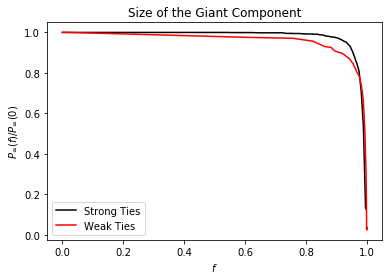

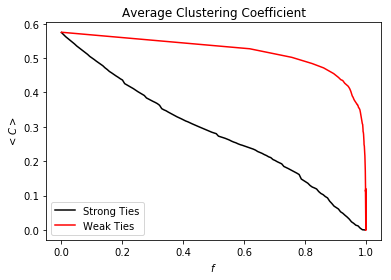

In [93]:
# Then we plot the results:
plt.plot(f_hist_str, P_hist_str, "k", label="Strong Ties")
plt.plot(f_hist_weak, P_hist_weak, "r", label="Weak Ties")
plt.title("Size of the Giant Component")
plt.xlabel("$f$")
plt.ylabel("$P_\infty(f)/P_\infty(0)$")
plt.legend()
plt.show()

plt.plot(f_hist_str, clust_hist_str, "k", label="Strong Ties")
plt.plot(f_hist_weak, clust_hist_weak, "r", label="Weak Ties")
plt.title("Average Clustering Coefficient")
plt.xlabel("$f$")
plt.ylabel("$<C>$")
plt.legend()
plt.show()